**<p style="font-size:30px;">Statistical Inference and Data Visualization for the Humanities</p>**

<u>
Developed by: Golnaz Sarkar Farshi
</u>

This lesson is part of the Data Carpentries curriculum of the data competence center <A Href="https://hermes-hub.de/">HERMES</A>.

# Data Visualization

## Why visualize data?

Data visualization hat multiple purposes. It can

- facilitate exploration;
- identify relationships and correlations;
- enhance communication;
- support storytelling.

## Categories of data visualization

Visualizing data can serve one of the following purposes:

### Explore Relationships between two or more features:

**Scatter plot:** "A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables." (<A Href="https://www.atlassian.com/data/charts/what-is-a-scatter-plot">Atlassian</A>) For example, the X axis can represent the age of the employees at a company, where the Y axis represents their income.

**Bubble chart:** "A bubble chart (aka bubble plot) is an extension of the scatter plot used to look at relationships between three numeric variables. Each dot in a bubble chart corresponds with a single data point, and the variables’ values for each point are indicated by horizontal position, vertical position, and dot size." (<A Href="https://www.atlassian.com/data/charts/bubble-chart-complete-guide">Atlassian</A>) Bubble charts can also represent a categorical feature with their color. For example, where the X axis represents the age of employees, the Y axis represents their income, and the size of the bubbles represents their years of works experience, the colors of the bubbles can represent their gender. 

Below you can see examples of a scatter plot and a bubbgle chart.

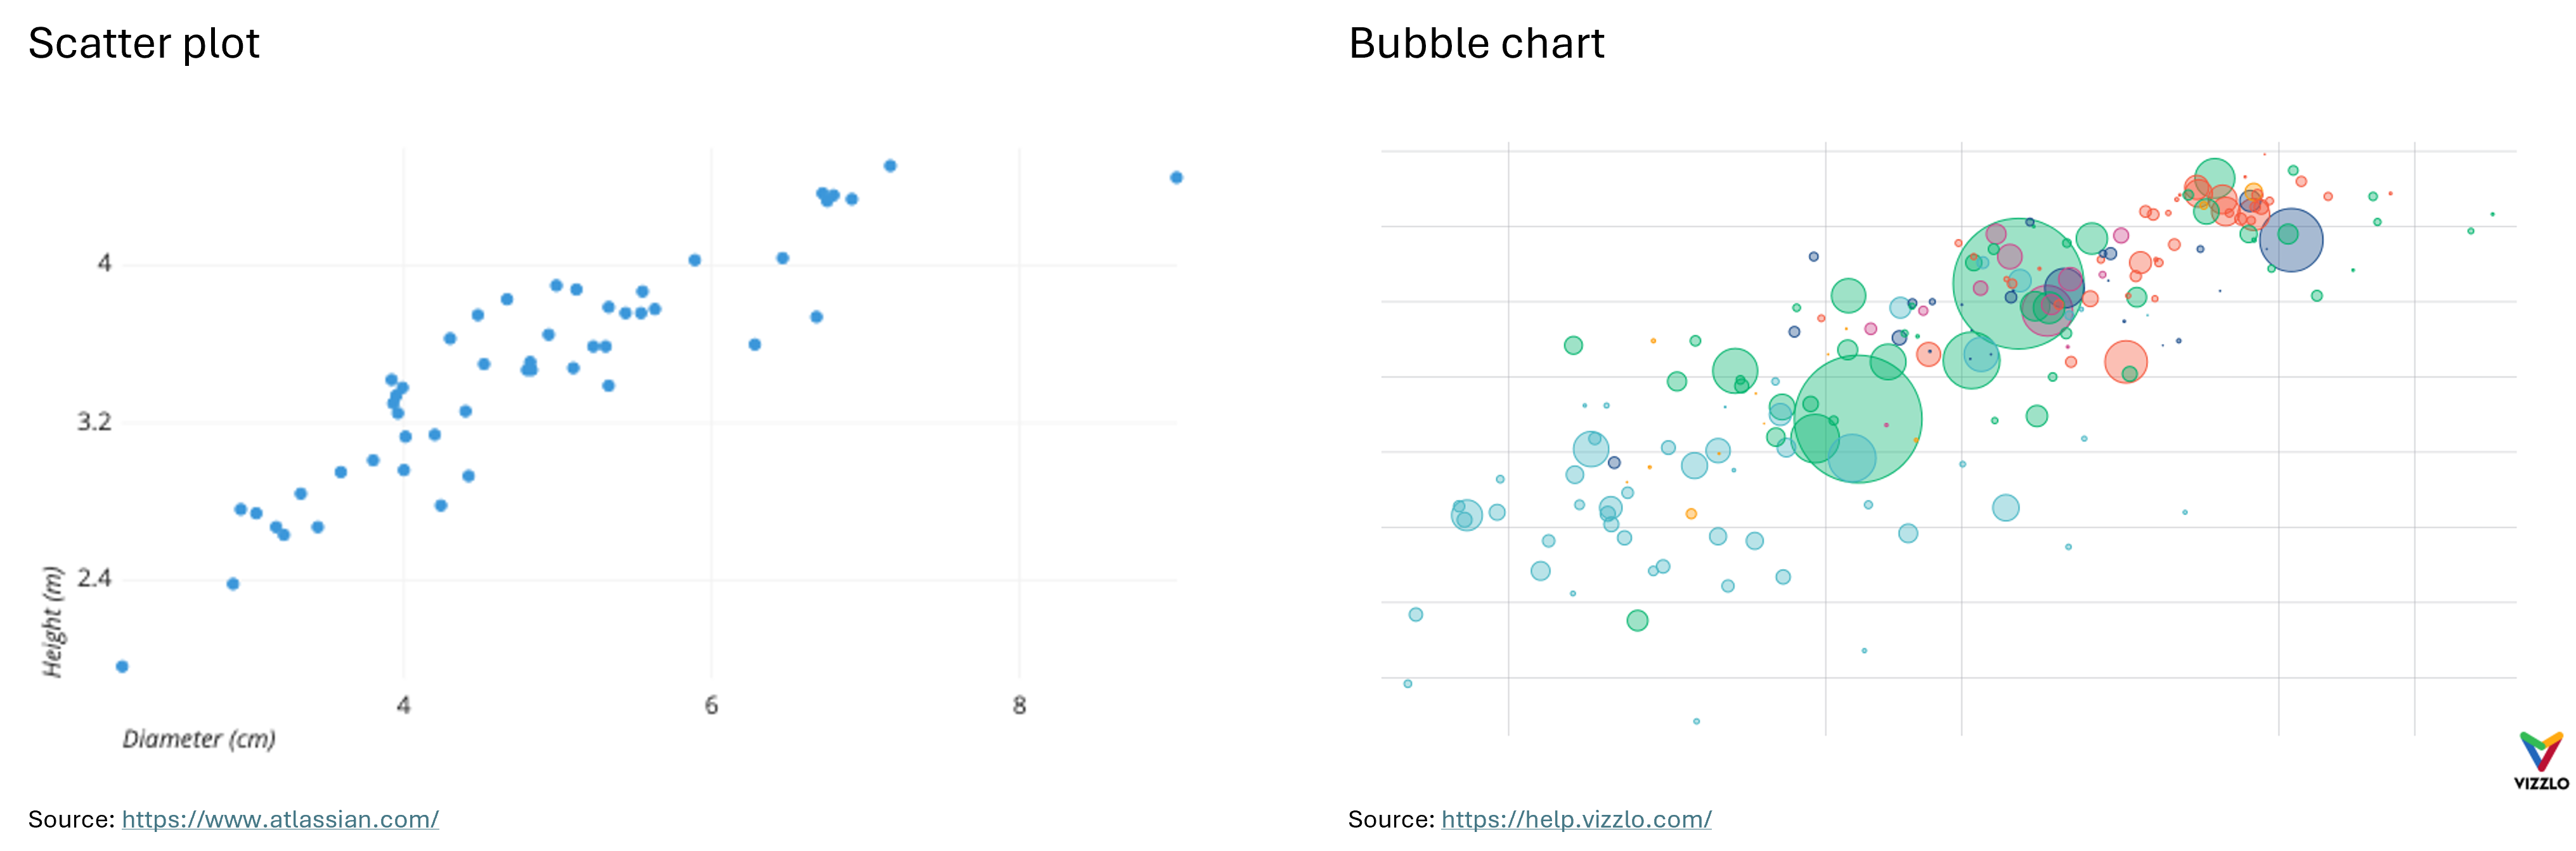

### Compare different measures or trends:

**Bar chart:** "A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values." (<A Href="https://www.atlassian.com/data/charts/bar-chart-complete-guide">Atlassian</A>) For example, the X axis can represent the skill levels of the employees at a company (entry level, mid-level and advanced), where the Y axis represents the average annual salary of each group.

**Line chart:** "A line chart (aka line plot, line graph) uses points connected by line segments from left to right to demonstrate changes in value. The horizontal axis depicts a continuous progression, often that of time, while the vertical axis reports values for a metric of interest across that progression." (<A Href="https://www.atlassian.com/data/charts/line-chart-complete-guide">Atlassian</A>) For example, the X axis can represent the years between 2000 and 2024 where the Y axis represents the average salary of advanced employeed at a company. 

Below you can see examples of a bar chart and a line chart. 

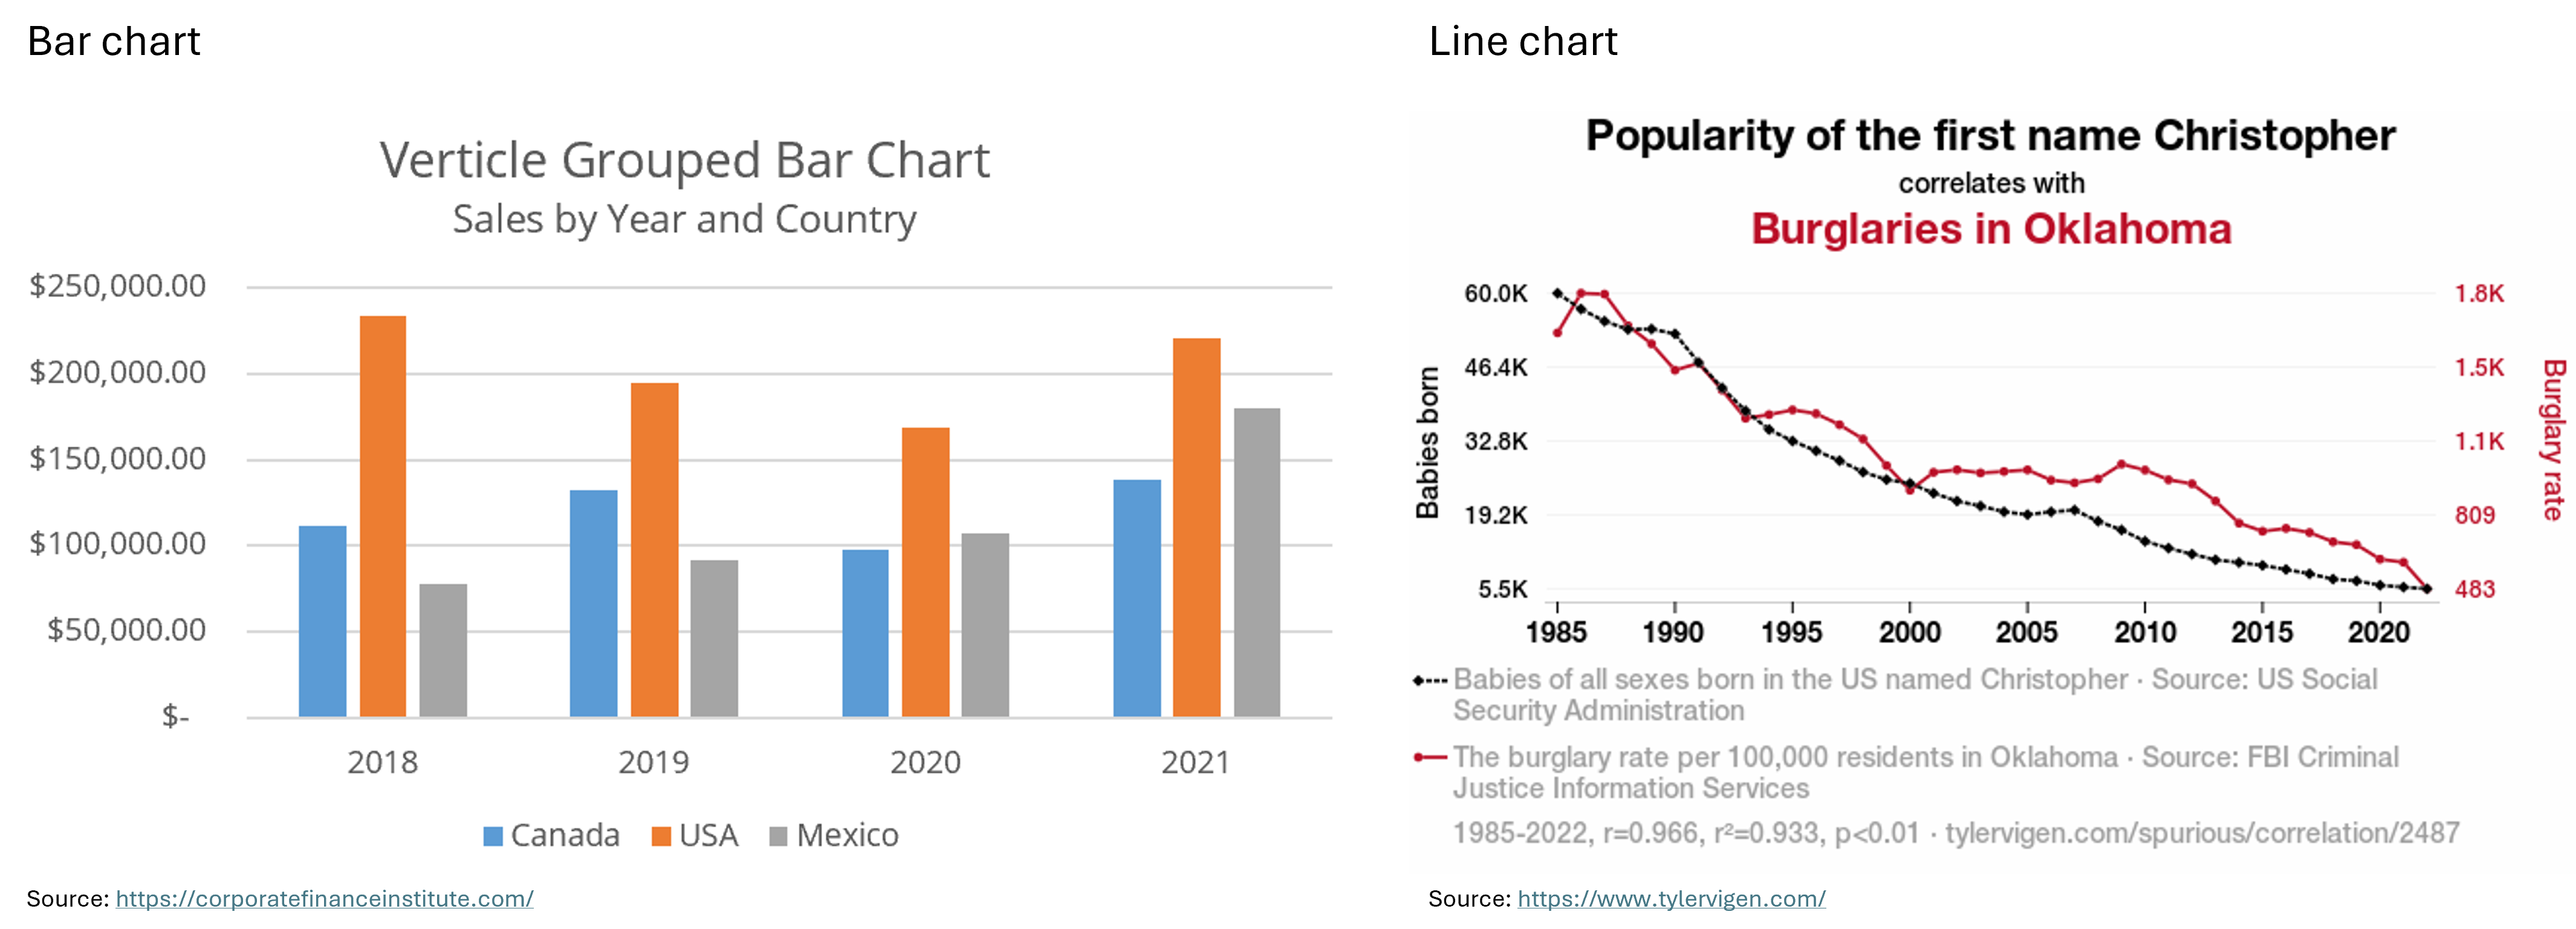

### Explore distributions:

**Histogram:** "A histogram is a chart that plots the distribution of a numeric variable’s values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin." (<A Href="https://www.atlassian.com/data/charts/histogram-complete-guide">Atlassian</A>) For example, the bins in the X axis can represent the salary ranges <u>¥30,000 - ¥39,999</u>, <u>¥40,000 - ¥49,999</u> and <u>¥50,000 - ¥59,999</u>, where the Y axis represents the number of employees (or the frequency) within each salary range.

**Box plot:** "Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers. It is easy to see where the main bulk of the data is, and make that comparison between different groups." (<A Href="https://www.atlassian.com/data/charts/box-plot-complete-guide">Atlassian</A>)

"The box itself indicates the range in which the middle 50% of all values lie. Thus, the lower end of the box is the 1st quartile and the upper end is the 3rd quartile. Therefore below Q1 lie 25% of the data and above Q3 lie 25% of the data, in the box itself lie 50% of your data. 

Let's say we look at the age of individuals in a boxplot, and Q1 is 31 years, then it means that 25% of the participants are younger than 31 years. If Q3 is 63 years, then it means that 25% of the participants are older than 63 years, 50% of the participants are therefore between 31 and 63 years old. Thus, between Q1 and Q3 is the interquartile range.

In the boxplot, the solid line indicates the median and the dashed line indicates the mean. For example, if the median is 42, this means that half of the participants are younger than 42 and the other half are older than 42. The median thus divides the individuals into two equal groups.

The T-shaped whiskers go to the last point, which is still within 1.5 times the interquartile range. The T-shaped whisker is either the maximum value of your data but at most 1.5 times the interquartile range. Any observations that are more than 1.5 interquartile range (IQR) below Q1 or more than 1.5 IQR above Q3 are considered outliers. If there are no outliers, the whisker is the maximum value." (<A Href="https://datatab.net/tutorial/box-plot">DATAtab</A>)

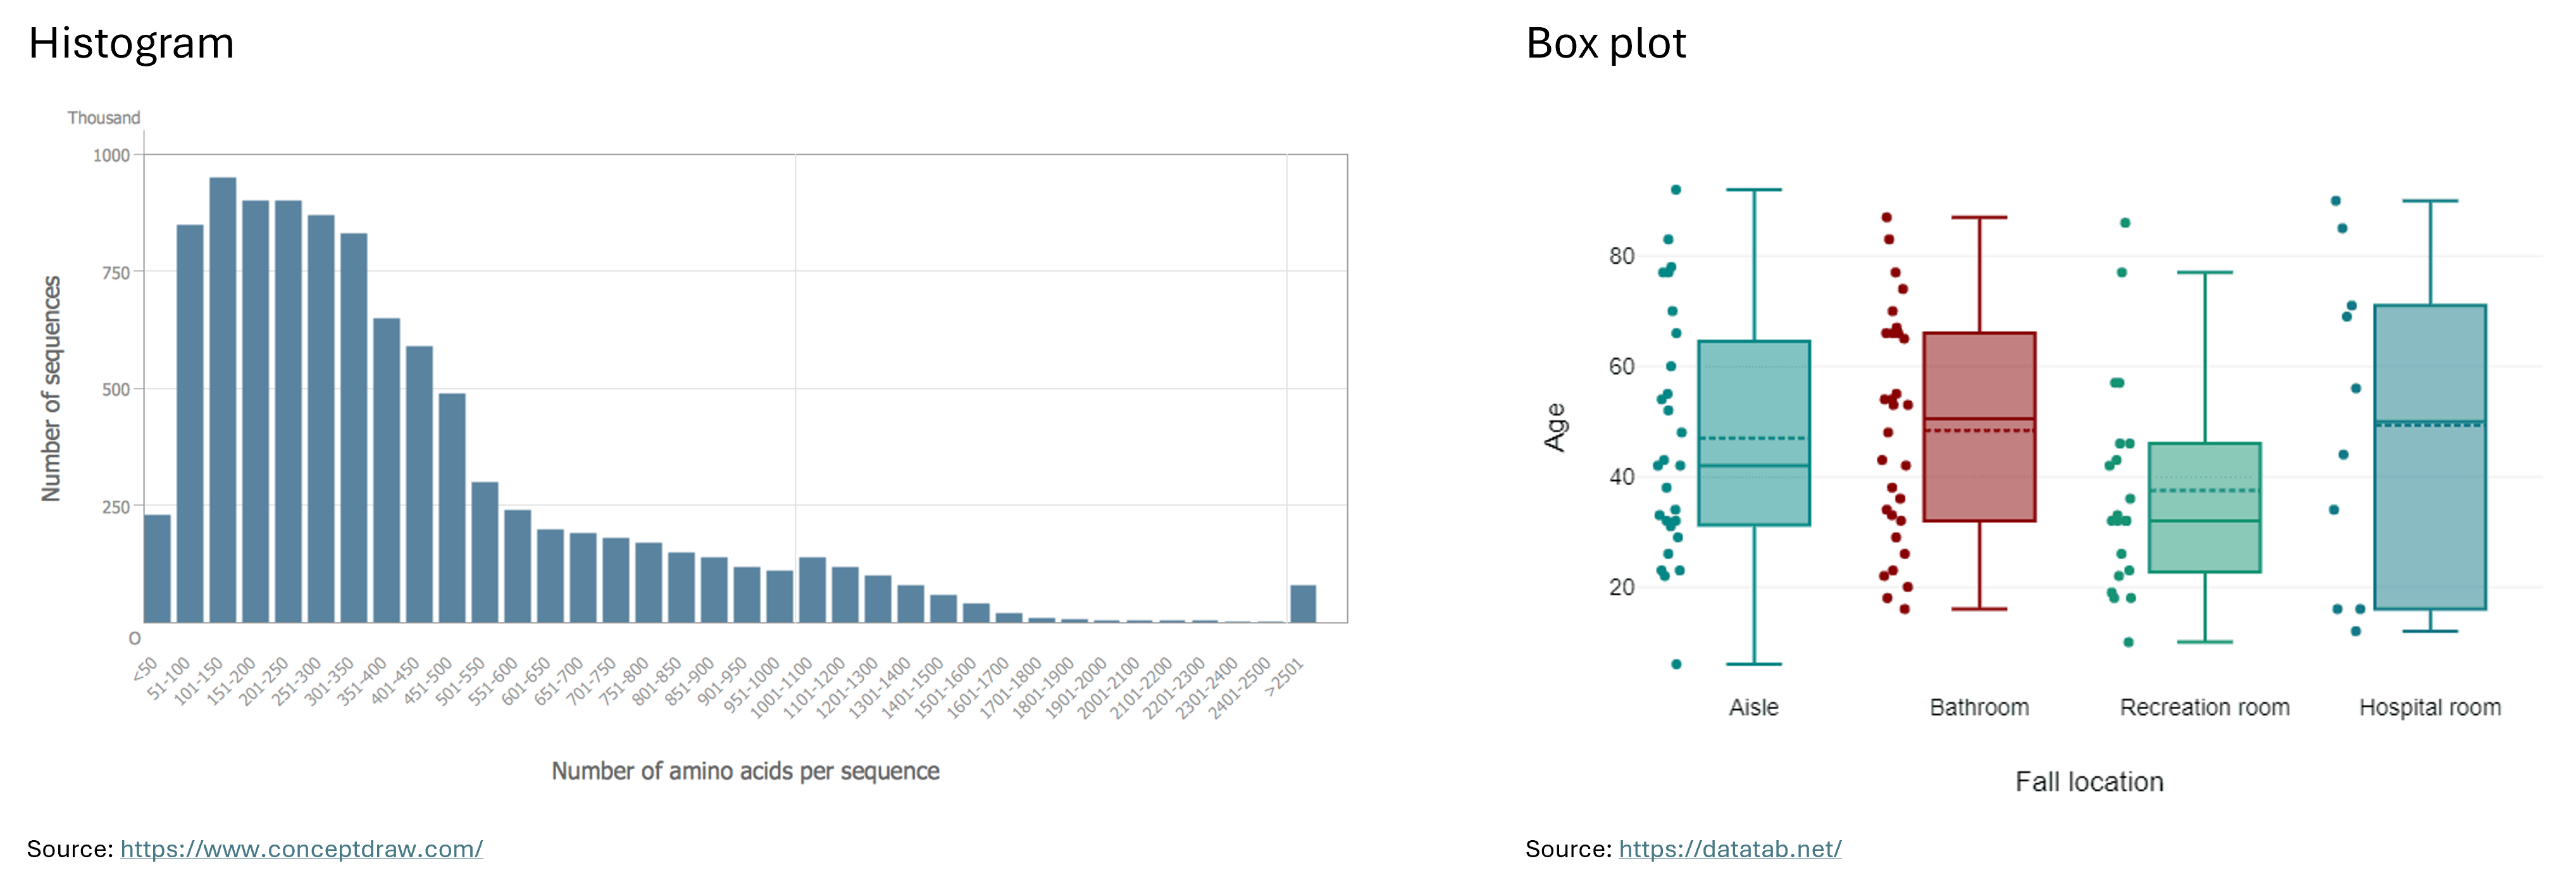

### Draw comparisons:

**Pie chart:** "A pie chart shows how a total amount is divided between levels of a categorical variable as a circle divided into radial slices. Each categorical value corresponds with a single slice of the circle, and the size of each slice (both in area and arc length) indicates what proportion of the whole each category level takes." (<A Href="https://www.atlassian.com/data/charts/pie-chart-complete-guide">Atlassian</A>) For example, a pie chart could represent which percentage of a company's budget is spent in which areas. 

**Stacked bar chart:** "A stacked bar chart is a type of bar chart that portrays the compositions and comparisons of several variables through time. Stacked charts usually represent a series of bars or columns stacked on top of one another. They are widely used to effectively portray comparisons of total values across several categories." (<A Href="https://www.jaspersoft.com/articles/what-is-a-stacked-chart">Jaspersoft</A>) For example, the X axis of a stacked bar chart can represent bins, each containing 5 years, and the Y axis can represent the number of a company's employeed in each one of the 5-year intervals. Each bar can contain groups of employeed based on their experience level, represented by different colors.

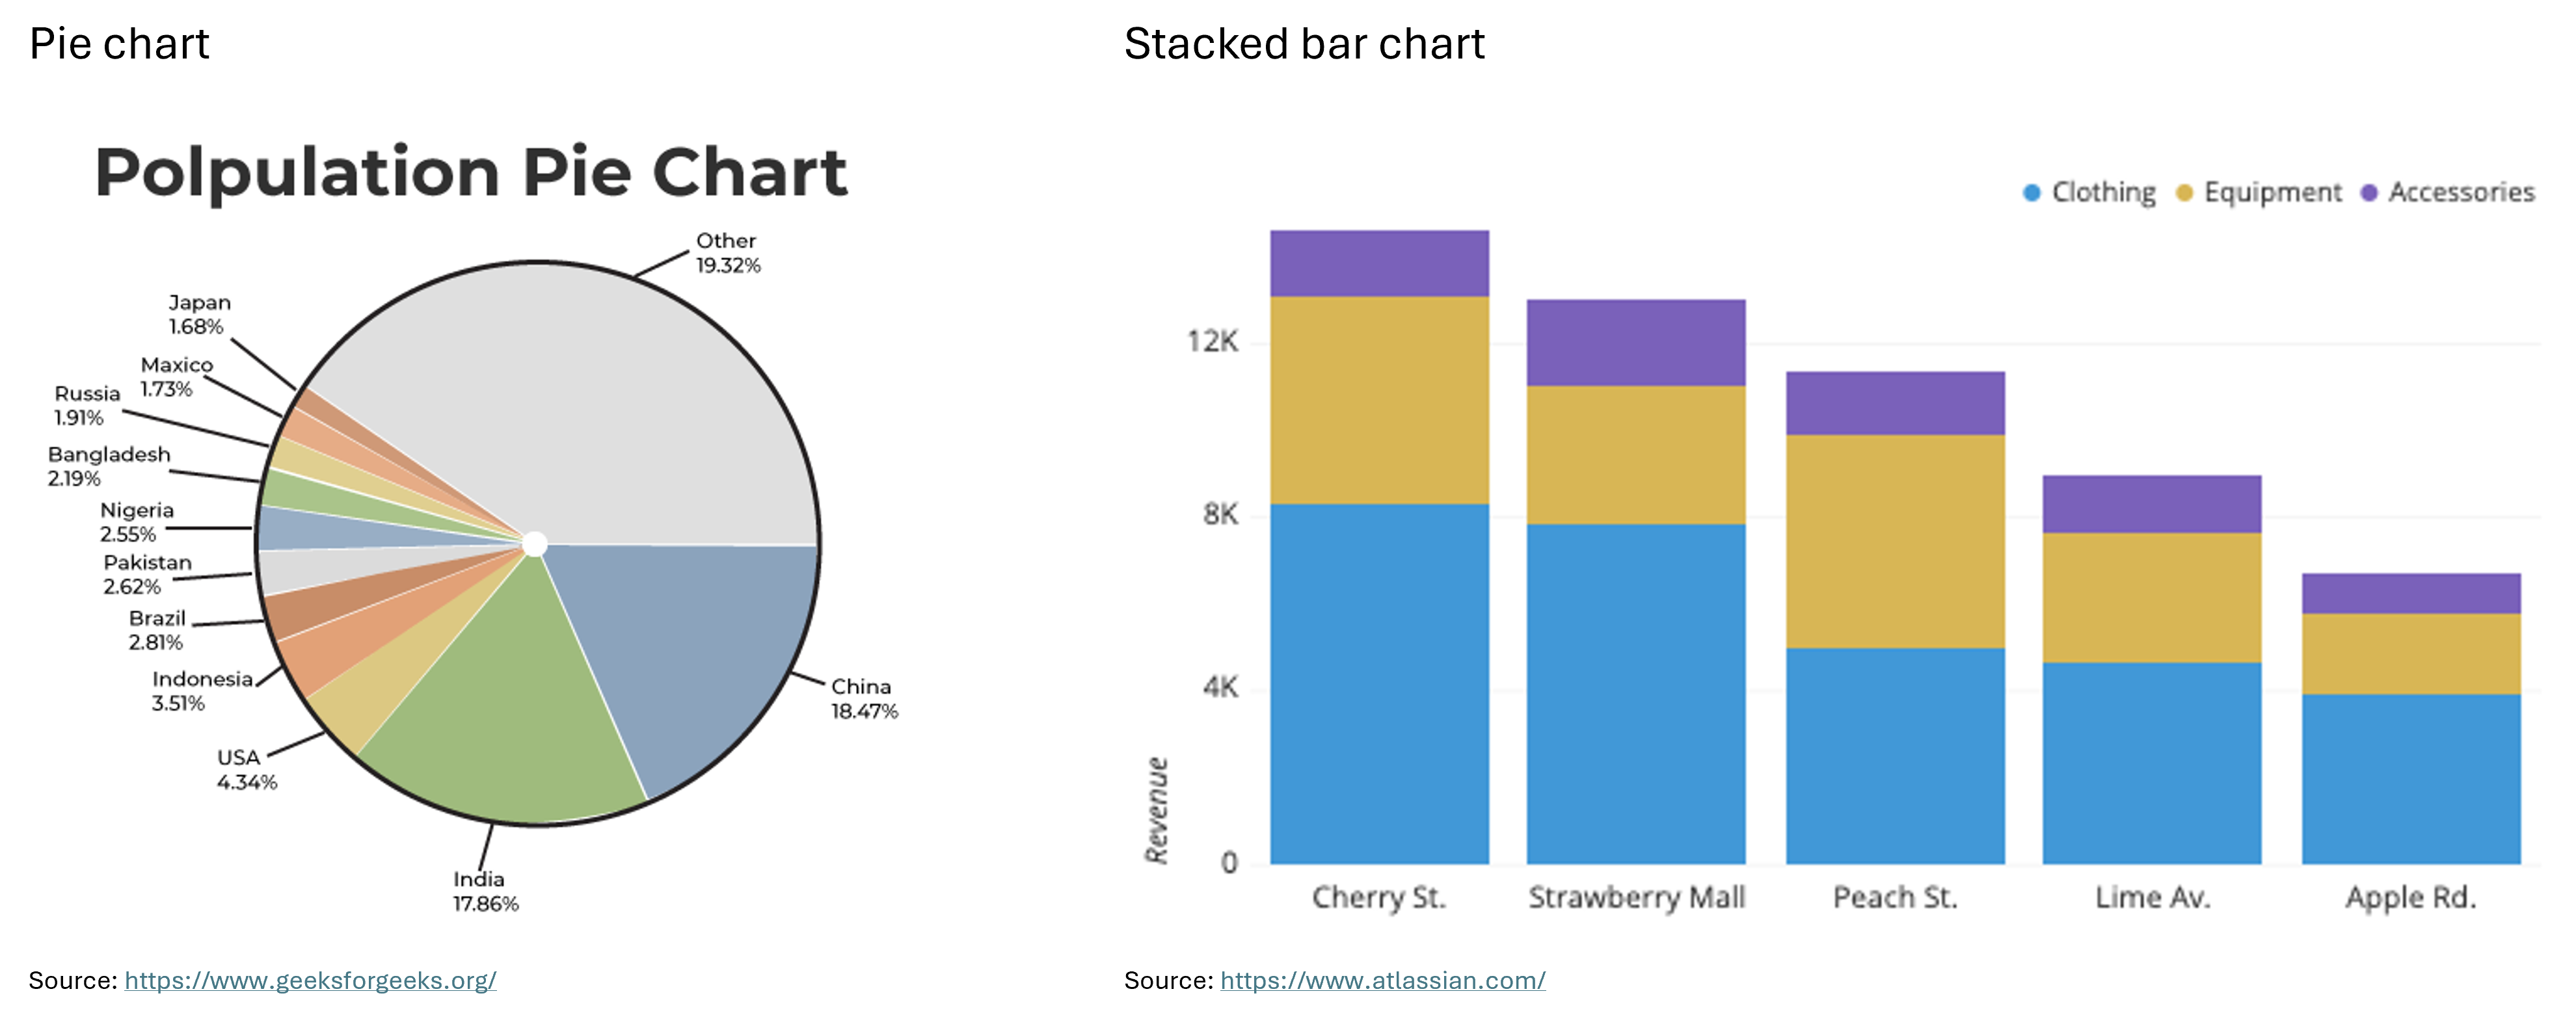

<font color=red>
We are here.
</font>

# What is Statistical Inference and Why do Digital Humanists need it?

**Statistical Inference:** the theory, methods, and practice of forming judgements about the parameters of a population and the reliability of statistical relationships, typically on the basis of <u> random sampling </u>. (Oxford Dictionary)

The wine quality dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

Most Streamed Spotify Songs 2024: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024?resource=download 

114000 Spotify Songs: https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

In [15]:
import pandas as pd

In [37]:
spotify_df= pd.read_csv('./data/114000_spotify_songs.csv')
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [34]:
list(spotify_df.columns)

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [33]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [1]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

In [7]:
# # Function to scrape individual movie details
# def scrape_movie_details(movie_url):
#     response = requests.get(movie_url)
#     print("Access status:", response.status_code)
#     if response.status_code == 200:
#         print("Access granted. Scraping successful.")
#         soup = BeautifulSoup(response.text, 'html.parser')
        
#         title = soup.find('h1').text.strip()
#         year = soup.find('span', class_='TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex').text.strip()
#         actors = [actor.text.strip() for actor in soup.find_all('a', class_='StyledComponents__ActorName-y9ygcu-1 eyqFnv')]
#         genre = [genre.text.strip() for genre in soup.find_all('a', class_='GenresAndPlot__GenreChip-cum89p-3 fzmeux ipc-chip ipc-chip--on-baseAlt')]
#         rating = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV').text.strip()
        
#         return {
#             'title': title,
#             'year': year,
#             'actors': actors[:5],  # Select first 5 actors
#             'genre': genre,
#             'rating': rating
#         }
#     else:
#         print("Access denied. Scraping failed.1")
#         return None

In [8]:
# # Function to scrape the list of movies
# def scrape_movie_list(url):
#     response = requests.get(url)
#     print("Access status:", response.status_code)
#     if response.status_code == 200:
#         print("Access granted. Scraping successful.")
#         soup = BeautifulSoup(response.text, 'html.parser')
#         movie_list = soup.find_all('div', class_='lister-item-content')

#         movie_details = []
#         for movie in movie_list:
#             movie_link = movie.find('a', href=True)['href']
#             movie_url = f'https://www.imdb.com{movie_link}'
#             movie_info = scrape_movie_details(movie_url)
#             if movie_info:
#                 movie_details.append(movie_info)

#         return movie_details
#     else:
#         print("Access denied. Scraping failed.2")
#         return None

In [9]:
# # Main function to scrape IMDb
# def scrape_imdb(url):
#     movie_details = scrape_movie_list(url)
#     return movie_details

In [25]:
# # The search URL includes movies made in the US in the last three months of the year 2000:
# url= 'https://www.imdb.com/search/title/?release_date=2000-01-01,2000-01-15&country_of_origin=US'

# imdb_data = scrape_imdb(url)
# imdb_data

# # Print the data
# # for movie in imdb_data:
# #     print(movie)